# 1

Cheung Cheuk Hei 3035899072
Yu Cheuk Yin 3035801996
Li Baorui 3035770733
Law Ho Wai 3035780714

Group 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We simply modify the code as a function of chain size.

In [2]:
def edg(chain_length):
    dimension=2**chain_length
    #spin chain with all spin-down
    z='0'*chain_length
    N=chain_length
    # initialize hamiltonian
    H=np.zeros((dimension,dimension))
    # Matrix Construction
    for a in range(dimension):
        state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
        state_chain=z[0:N-len(state_chain)]+state_chain # make the length equal to N
        #print(state_chain)
    # for PBC, we set i in range(N)
    # for OBC, we set i in range(N-1)
        for i in range(N):
            j=np.mod(i+1,N)
            if state_chain[i]==state_chain[j]: # i=j only diagonal elements
                H[a,a]+=0.25
            else:                              # else, the raising/lowering operators also have contributions
                H[a,a]-=0.25
                #flip
    #here we are doing the concatenation of string (you can try other methods)
    #                    print(state_chain)
                state_chain1=state_chain[i]+state_chain[1:i]+state_chain[j] if j==0 else state_chain[0:i]+state_chain[j]+state_chain[i]+state_chain[j+1:]
                b=int(state_chain1,2)
                H[a,b]+=0.5
    return H

In [3]:
H10=edg(10)
print(H10)

[[2.5 0.  0.  ... 0.  0.  0. ]
 [0.  1.5 0.5 ... 0.  0.  0. ]
 [0.  0.5 1.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.5 0.5 0. ]
 [0.  0.  0.  ... 0.5 1.5 0. ]
 [0.  0.  0.  ... 0.  0.  2.5]]


In [4]:
eig_value10,eig_vec10=np.linalg.eig(H10)# eigen_values,eigenstates
eig_value10,eig_vec10=np.real(eig_value10),np.real(eig_vec10)


The state with the lowest energy is the first eigenvector, where we plot below. As the graph below shows there is only 1 state with coefficient 1, which means the eigenvector consists of only 1 chain state $\ket{1015}=\ket{1111110111}$, and the chain has the lowest amount of energy -4.515446.

-4.515446354492037 [0. 0. 0. ... 0. 0. 0.]
(array([1016]),) 1111110111


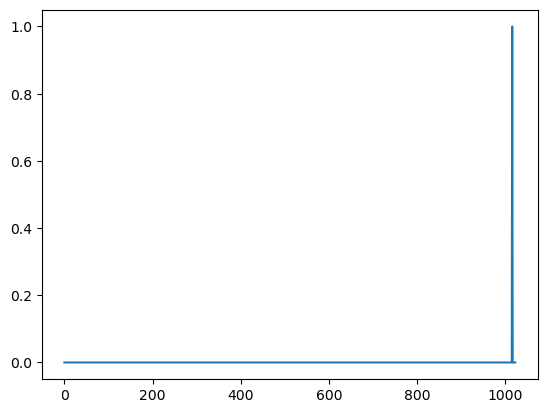

In [5]:
# ground state energy
#min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value10)
eig_value10=eig_value10[idx_sorted1]
eig_vec10=eig_vec10[:,idx_sorted1]
print(eig_value10[0], eig_vec10[0])
plt.plot(np.array([i for i in range(len(eig_vec10[:,0]))]),eig_vec10[0,:])
print(np.where(eig_vec10[0,:]==1),bin(1015)[2:])

In [6]:
energy_level10=np.sort(eig_value10)

We show the energy level of N=10 (even). Note for the lowest energy level, there is only a singular state and is not degenerate. This is also the same for the third lowest state.

Text(0.5, 1.0, 'Energy Level of Spin Chain, N=10')

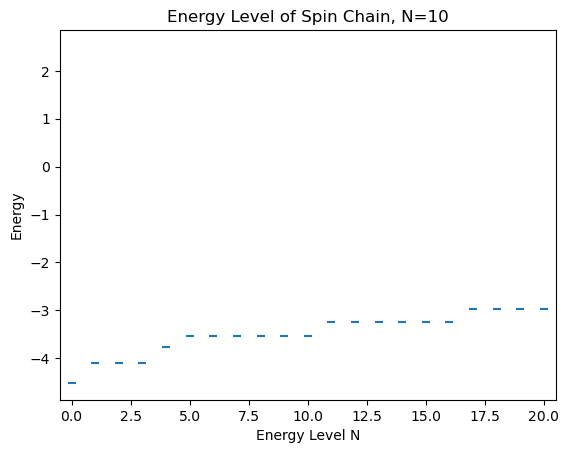

In [7]:
plt.scatter(np.arange(0,len(energy_level10)),energy_level10,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
#plt.ylim(-5,-4)
plt.xlim(-0.5,20.5)
plt.title(f'Energy Level of Spin Chain, N=10')

In [8]:
H11=edg(11)
print(H11)

[[2.75 0.   0.   ... 0.   0.   0.  ]
 [0.   1.75 0.5  ... 0.   0.   0.  ]
 [0.   0.5  1.75 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.75 0.5  0.  ]
 [0.   0.   0.   ... 0.5  1.75 0.  ]
 [0.   0.   0.   ... 0.   0.   2.75]]


In [9]:
eig_value11,eig_vec11=np.linalg.eig(H11)# eigen_values,eigenstates
eig_value11,eig_vec11=np.real(eig_value11),np.real(eig_vec11)

The eigenvector consists of only 1 chain state $\ket{2041}=\ket{11111111001}$, and the chain has the lowest amount of energy -4.718936.

-4.718936362524404 [0. 0. 0. ... 0. 0. 0.]
(array([2041]),) 11111111001


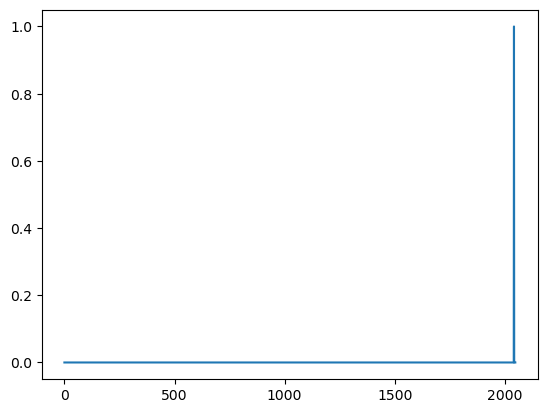

In [10]:
# ground state energy
#min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value11)
eig_value11=eig_value11[idx_sorted1]
eig_vec11=eig_vec11[:,idx_sorted1]
print(eig_value11[0], eig_vec11[0])

plt.plot(np.array([i for i in range(len(eig_vec11[:,0]))]),eig_vec11[0,:])
print(np.where(eig_vec11[0,:]==1),bin(2041)[2:])

In [11]:
energy_level11=np.sort(eig_value11)

We show the energy level of N=11 (odd). Note for the lowest energy level, there are four states and is degenerate. 

Text(0.5, 1.0, 'Energy Level of Spin Chain, N=11')

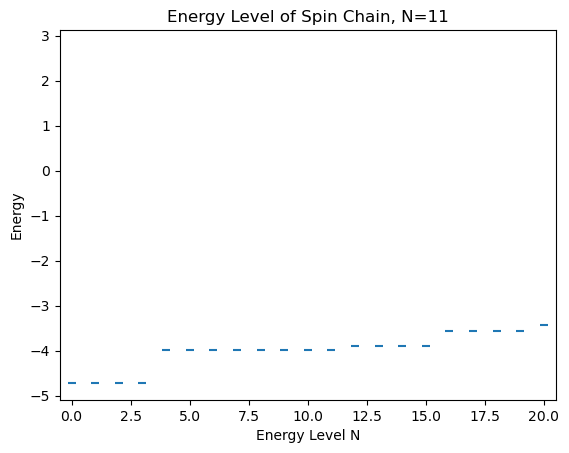

In [12]:
plt.scatter(np.arange(0,len(energy_level11)),energy_level11,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
#plt.ylim(-5,-4)
plt.xlim(-0.5,20.5 )
plt.title('Energy Level of Spin Chain, N=11')

We further investigate the pattern of even and odd chain lengths (from chain length N=2 to 9). For even chain lengths, the lowest energy level is always non-degenerate. We also note the energy level pattern (degeneracy of lowest states) for N=6,8,10 follows the same exact pattern. For odd chain lengths, the lowest energy level is always degenerate with 4 identical degenerate states.

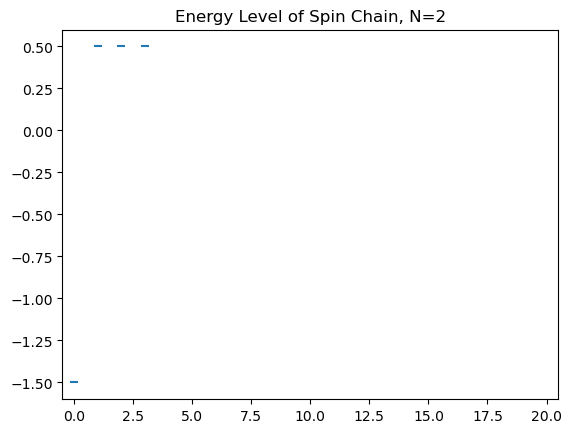

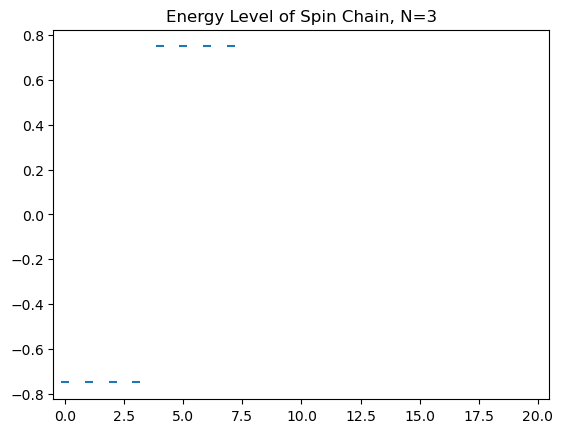

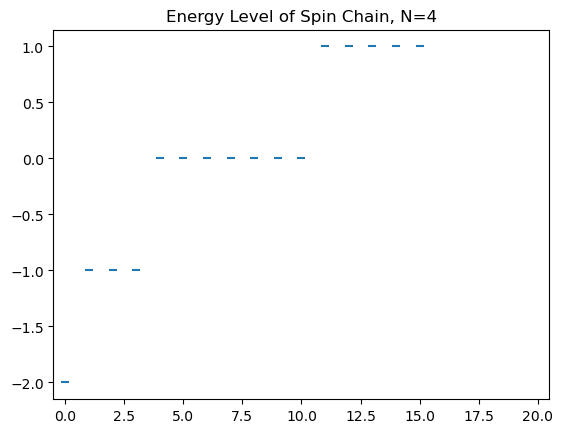

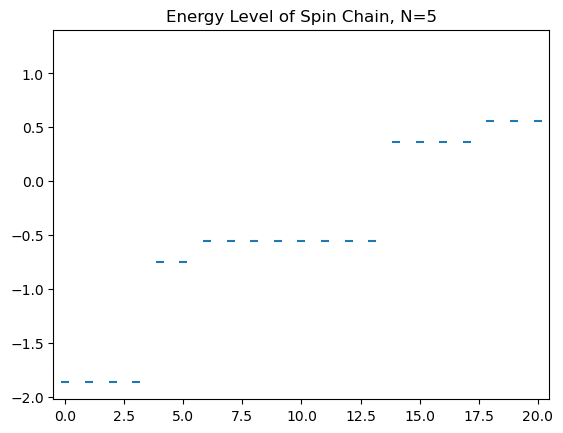

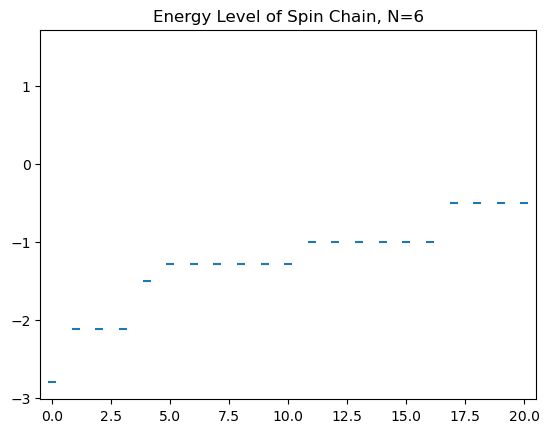

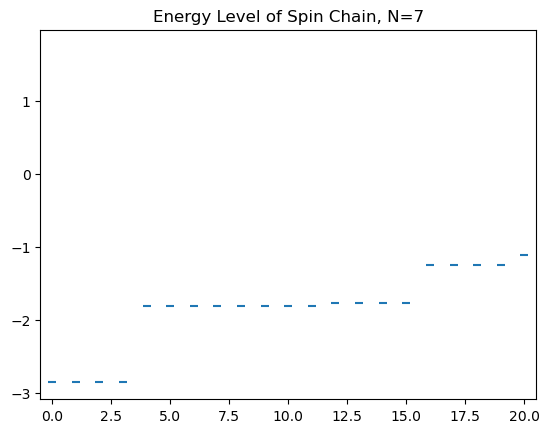

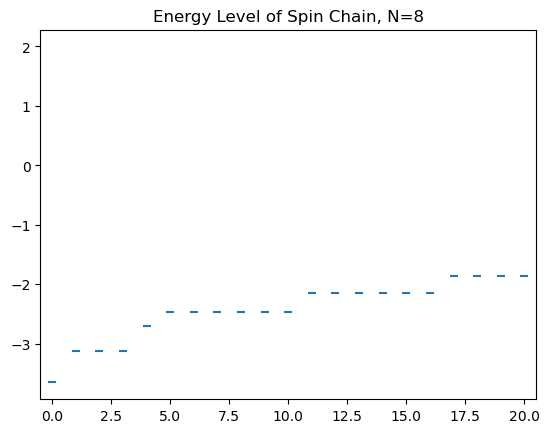

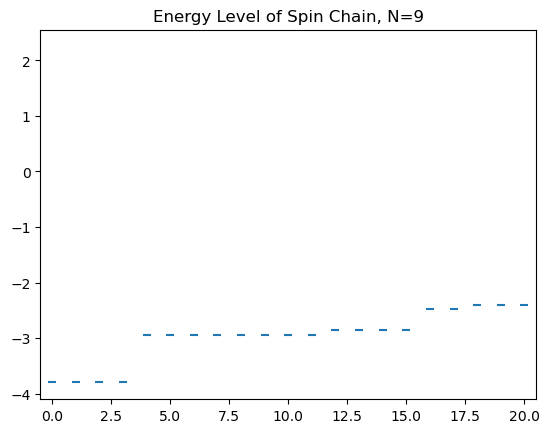

In [13]:
for Ni in range(2,10):
    H=edg(Ni)
    eig_value,eig_vec=np.linalg.eig(H)# eigen_values,eigenstates
    eig_value,eig_vec=np.real(eig_value),np.real(eig_vec)
    idx_sorted1 = np.argsort(eig_value)
    eig_value3=eig_value[idx_sorted1]
    eig_vec3=eig_vec[:,idx_sorted1]
    eig_value3[0], eig_vec3[:,0]
    plt.xlim(-0.5,20.5)
    plt.scatter(np.arange(0,len(eig_value)),np.sort(eig_value),marker='_')
    plt.title(f'Energy Level of Spin Chain, N={Ni}')
    plt.show()

# 2

For a quantum system described by density matrix $\rho$, the von Neumann entropy is 

$S=-\text{tr}(\rho\ln\rho)$.
If we express the density matrix in the basis of its eigenvectors $\ket{1}=\ket{\downarrow\downarrow\downarrow\downarrow\downarrow\downarrow\downarrow\downarrow\downarrow\downarrow\downarrow}$,$\ket{2}$,$\ket{3}$... Then

$\rho=\sum_i a_i\ket{i}\bra{i}=\begin{pmatrix}
   a_0 & 0 & \cdots & 0 \\
0 & a_1 & \cdots & 0 \\
   \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & a_i 
 \end{pmatrix}$
 
 and therefore
 
 $S=-\text{tr}(\rho\ln\rho)=-\sum_i a_i \ln a_i $
 
 As there may be cases $a_i=0$ for $I_A=$ original chain length, we define $0\log0\equiv0$ as in information theory

In [14]:
def cal_renyi(psi,si,L,order):
  size1 = 2**(si)
  size2 = 2**(L-si)
  psi = psi.reshape((size1,size2))
  #reduced density matrix
  rho_r = psi@psi.T
  # print(rho_r)
  # print(np.linalg.eig(rho_r)[0])
  prob = np.linalg.eig(rho_r)[0]/np.trace(rho_r)
  renyi = (1/(1-order))*np.log(np.sum(prob**order))
  return renyi

def vonNeu(psi,si,L):
  size1 = 2**(si)
  size2 = 2**(L-si)
  psi = psi.reshape((size1,size2))
  #reduced density matrix
  rho_r = psi@psi.T
  # print(rho_r)
  # print(np.linalg.eig(rho_r)[0])
  prob = np.linalg.eig(rho_r)[0]/np.trace(rho_r)
  von=0
  for i in prob:
    von += 0 if i==0 else i*np.log(i)
  return -von

In [15]:
renyi=[1.2,1.5,2,3]

The Renyi Entropy and von Neumann entropy for N=10.

/Users/cheukyinyu/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


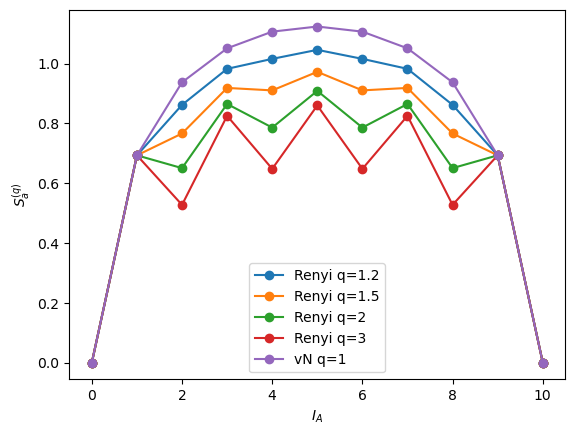

In [16]:
gs = eig_vec10[:,0]
na_list = np.arange(0,10+1)

for j in renyi:
    EE_list = []
    for i in range(len(na_list)):
        na_here = na_list[i]
        EE_here = cal_renyi(eig_vec10[:,0],na_here,10,j)
        EE_list.append(EE_here)
    plt.plot(na_list,EE_list,"o-",label=f"Renyi q={j}")
EE_list = []
for i in range(len(na_list)):
    na_here = na_list[i]
    EE_here = vonNeu(eig_vec10[:,0],na_here,10)
    EE_list.append(EE_here)
plt.plot(na_list,EE_list,"o-",label=f"vN q=1")
plt.ylabel(r'$S^{(q)}_a$')
plt.xlabel(r'$I_A$')
plt.legend()

The Renyi Entropy and von Neumann entropy for N=11.

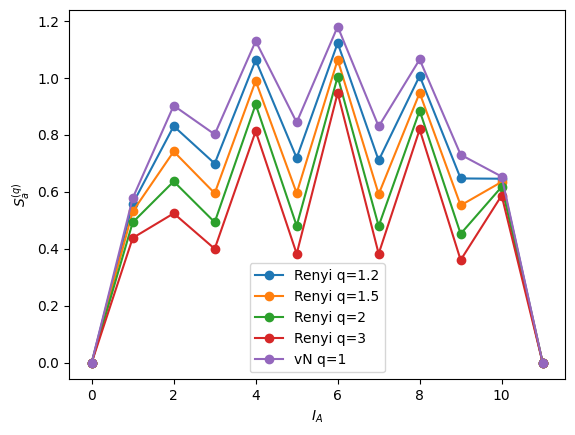

In [55]:
gs = eig_vec11[:,0]
na_list = np.arange(0,11+1)


for j in renyi:
    EE_list = []
    for i in range(len(na_list)):
        na_here = na_list[i]
        EE_here = cal_renyi(eig_vec11[:,0],na_here,11,j)
        EE_list.append(EE_here)
    plt.plot(na_list,EE_list,"o-",label=f"Renyi q={j}")
EE_list = []
for i in range(len(na_list)):
    na_here = na_list[i]
    EE_here = vonNeu(eig_vec11[:,0],na_here,11)
    EE_list.append(EE_here)
plt.plot(na_list,EE_list,"o-",label=f"vN q=1")
plt.ylabel(r'$S^{(q)}_a$')
plt.xlabel(r'$I_A$')
plt.legend()

We observe that for N=10 (even), the graph is symmetric (as chain is even length). For N=11 (odd), it is not symmetric and does not have a very regular up-down pattern. We can also observe similar results from N=6 to 9.

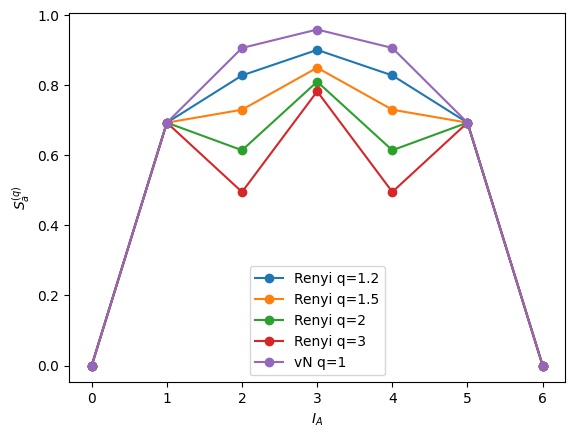

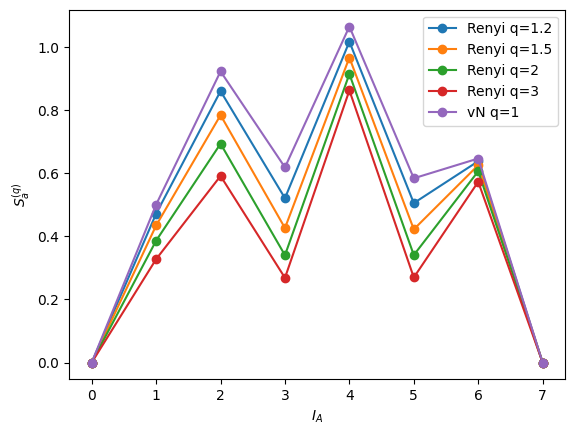

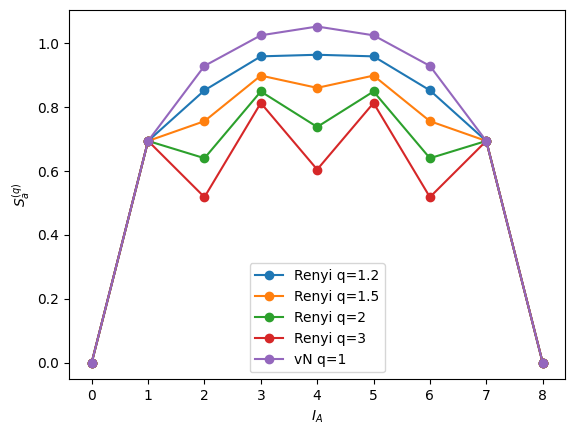

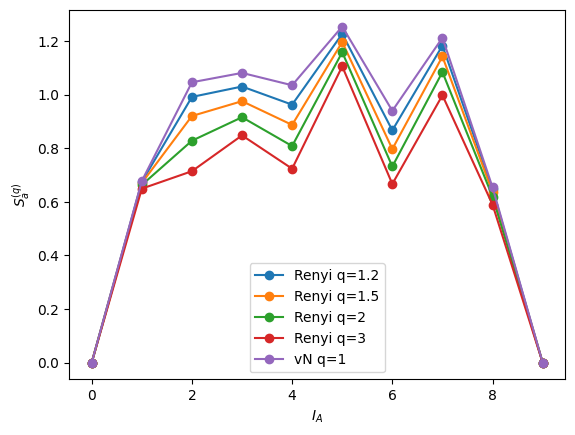

In [56]:
for Ni in range(6,10):
    H=edg(Ni)
    eig_value,eig_vec=np.linalg.eig(H)# eigen_values,eigenstates
    eig_value,eig_vec=np.real(eig_value),np.real(eig_vec)
    idx_sorted1 = np.argsort(eig_value)
    eig_value3=eig_value[idx_sorted1]
    eig_vec3=eig_vec[:,idx_sorted1]
    eig_value3[0], eig_vec3[:,0]
    na_list = np.arange(0,Ni+1)


    for j in renyi:
        EE_list = []
        for i in range(len(na_list)):
            na_here = na_list[i]
            EE_here = cal_renyi(eig_vec3[:,0],na_here,Ni,j)
            EE_list.append(EE_here)
        plt.plot(na_list,EE_list,"o-",label=f"Renyi q={j}")
    EE_list = []
    for i in range(len(na_list)):
        na_here = na_list[i]
        EE_here = vonNeu(eig_vec3[:,0],na_here,Ni)
        EE_list.append(EE_here)
    plt.plot(na_list,EE_list,"o-",label=f"vN q=1")
    plt.ylabel(r'$S^{(q)}_a$')
    plt.xlabel(r'$I_A$')
    plt.legend()

    plt.show()